In [263]:
%ls

README.md                           ideal_mix.json
clean_data.py                       landsend_veg_2007_2012.csv
cleaned_landsend_veg_2007_2012.csv  lrs_goldengate_EDA.ipynb
define_column.py                    preprocess.ipynb


In [264]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [265]:
df = pd.read_csv("landsend_veg_2007_2012.csv")
df.head()

,Site-YearCode,Transect,Point,Height,Species,Plant code,Native Status,Life History,Stature
0,NUWO-2012,5,90,Low,-,-,-,-,-
1,NUWO-2012,13,150,Low,-,-,-,-,-
2,NMS-2010,8,20,Low,Achillea millefolium,ACMI,Native,Perennial,Forb
3,NMS-2010,24,4,Low,Achillea millefolium,ACMI,Native,Perennial,Forb
4,NMS-2010,48,16,Low,Achillea millefolium,ACMI,Native,Perennial,Forb


In [266]:
species = df[["Species"]].copy()
species["counts"] = 1
species_freq = species.groupby("Species").agg(sum).iloc[:, 0]
pass

In [267]:
#species_freq.plot(kind = "bar")
#pass

In [268]:
species_freq.head()

Species
-                         2
AVSP litter               2
Abronia latifolia         8
Achillea millefolium     46
Achillea millefolium     22
Name: counts, dtype: int64

In [269]:
df_yr_sp = df[["Site-YearCode", "Species", "Plant code"]]
valid = ~ df[["Site-YearCode", "Species", "Plant code"]].applymap(lambda x : x =="-").any(axis=1)
df_yr_sp = df_yr_sp.loc[valid]
df_yr_sp["year"] = df_yr_sp["Site-YearCode"].map(lambda x : int(x.split("-")[-1]) )
df_yr_sp["site"] = df_yr_sp["Site-YearCode"].map(lambda x : x.split("-")[0] )

df_yr_sp.drop("Site-YearCode", axis=1, inplace=True)
df_yr_sp.head()

,Species,Plant code,year,site
2,Achillea millefolium,ACMI,2010,NMS
3,Achillea millefolium,ACMI,2010,NMS
4,Achillea millefolium,ACMI,2010,NMS
5,Achillea millefolium,ACMI,2010,NMS
6,Achillea millefolium,ACMI,2011,NMS


In [270]:
#for kk, vv in df_yr_sp.groupby("year"):
#    print kk
#    print vv["Species"].unique().shape[0]

In [271]:
df_yr_sp = df_yr_sp.loc[pd.notnull(df_yr_sp["Plant code"])]

In [272]:
df_yr_sp[["Plant code"]].isnull().mean()

Plant code    0
dtype: float64

In [273]:
type(df_yr_sp)

pandas.core.frame.DataFrame

In [274]:
grouped = df_yr_sp.groupby(["site", "year", "Plant code"]).count()

In [275]:
grouped.shape

(379, 1)

In [276]:
grouped.head(50)

Species
site year Plant code         
EAPO 2011 AV sp.            6
          BAPI             51
          BG                5
          BRDI             50
          BRHO             11
          BRMA             42
          CAED              2
          CAPY              3
          CETH             24
          CYEC              2
          EHER              1
          ERLA              1
          ERST              2
          ESCA              1
          FRCH              6
          GEDI              2
          HEAR              3
          HEHECA            6
          HOLA              1
          IRDO              1
          LO sp.            8
          LUAR              5
          PIRA              7
          PTAQ              2
          RASA             12
          RHCA              6
          RUAC              5
          RUUR             78
          SCCA             18
          TODI             17
          VU sp.           12
NMS  2010 ACMI              5
          ANAR              1
          ANMA              4
          ARMA              1
          ASCH              2
          AVSP             38
          BAPI             10
          BG               39
          BRDI              9
          BRMA              8
          CAPY              1
          CEGL              5
          CETH              1
          CUMA              6
          EHER              1
          ELGL              1
          ERGL              2
          ERLA              7
          ERST              7

In [277]:
agg_df = grouped.reset_index()

In [278]:
total_sp = agg_df.groupby(["site", "year"]).sum()

In [279]:
total_sp_agg = total_sp.reset_index()

In [280]:
agg_df.head()

,site,year,Plant code,Species
0,EAPO,2011,AV sp.,6
1,EAPO,2011,BAPI,51
2,EAPO,2011,BG,5
3,EAPO,2011,BRDI,50
4,EAPO,2011,BRHO,11


In [281]:
total_sp_agg.head()

,site,year,Species
0,EAPO,2011,390
1,NMS,2010,232
2,NMS,2011,174
3,NMS,2012,331
4,NUWO,2010,307


In [282]:
agg_df.loc[0, "year"]

2011

In [283]:
result = pd.merge(total_sp_agg, agg_df, how='left', on=["site", "year"])

In [284]:
result.head()


,site,year,Species_x,Plant code,Species_y
0,EAPO,2011,390,AV sp.,6
1,EAPO,2011,390,BAPI,51
2,EAPO,2011,390,BG,5
3,EAPO,2011,390,BRDI,50
4,EAPO,2011,390,BRHO,11


In [285]:
result["Frequency"] = result["Species_y"] / result["Species_x"]

In [286]:
partial_entropy=result[["site","year", "Frequency"]].set_index(["site","year"]).applymap(lambda x : -x*math.log(x))\
    .reset_index()##["Partial entropy"]

In [287]:
partial_entropy.head()

,site,year,Frequency
0,EAPO,2011,0.064221
1,EAPO,2011,0.266027
2,EAPO,2011,0.055855
3,EAPO,2011,0.263349
4,EAPO,2011,0.100643


In [288]:
agg_entropies = partial_entropy.groupby(["site", "year"]).sum()

In [289]:
agg_entropies.head(10000)

Frequency
site year           
EAPO 2011   2.719140
NMS  2010   3.067338
     2011   2.933067
     2012   3.448299
NUWO 2010   2.897246
     2011   2.686705
     2012   3.056492
SUDU 2010   2.849899
     2011   2.726416
     2012   2.715525
     2013   1.332179

In [290]:
agg_entropy = agg_entropies.reset_index()

In [291]:
agg_entropy

,site,year,Frequency
0,EAPO,2011,2.719140
1,NMS,2010,3.067338
2,NMS,2011,2.933067
3,NMS,2012,3.448299
4,NUWO,2010,2.897246
5,NUWO,2011,2.686705
6,NUWO,2012,3.056492
7,SUDU,2010,2.849899
8,SUDU,2011,2.726416
9,SUDU,2012,2.715525


In [292]:
agg_entropy.loc[agg_entropy["site"]=="EAPO"]

,site,year,Frequency
0,EAPO,2011,2.71914


In [293]:
NMS_result = agg_entropy.loc[agg_entropy["site"]=="NMS"]

In [294]:
NMS_result

,site,year,Frequency
1,NMS,2010,3.067338
2,NMS,2011,2.933067
3,NMS,2012,3.448299


In [295]:
nms_time= list(NMS_result["year"])

In [296]:
nms_time

[2010, 2011, 2012]

In [297]:
nms_freq = list(NMS_result["Frequency"]) 

In [298]:
nms_freq

[3.0673381616694777, 2.9330672914166374, 3.4482991553089031]

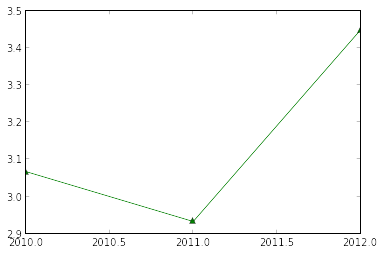

In [299]:

plt.plot(nms_time, nms_freq, "-^g")
x_formatter = plt.matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.gca().xaxis.set_major_formatter(x_formatter)

In [300]:
NUWO_result = agg_entropy.loc[agg_entropy["site"]=="NUWO"]

In [301]:
NUWO_result

,site,year,Frequency
4,NUWO,2010,2.897246
5,NUWO,2011,2.686705
6,NUWO,2012,3.056492


In [302]:
nuwo_time =  list(NUWO_result["year"])

In [303]:
nuwo_frequency = list(NUWO_result["Frequency"])

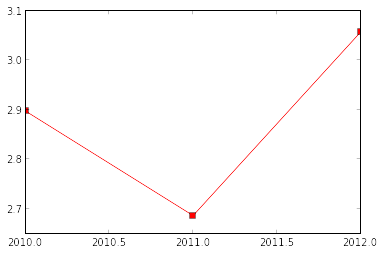

In [304]:
plt.plot(nuwo_time, nuwo_frequency, "-sr")
x_formatter = plt.matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.gca().xaxis.set_major_formatter(x_formatter)

In [317]:
SUDO_result = agg_entropy.loc[agg_entropy["site"]=="SUDU"]

In [318]:
SUDO_result

,site,year,Frequency
7,SUDU,2010,2.849899
8,SUDU,2011,2.726416
9,SUDU,2012,2.715525
10,SUDU,2013,1.332179


In [319]:
sudo_time = list(SUDO_result["year"])

In [320]:
sudo_frequency = list(SUDO_result["Frequency"])

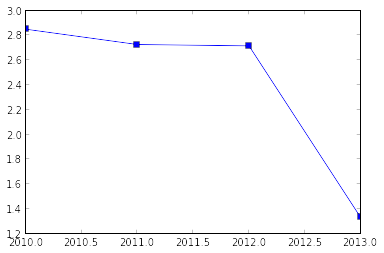

In [321]:
plt.plot(sudo_time, sudo_frequency, "-sb")
x_formatter = plt.matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.gca().xaxis.set_major_formatter(x_formatter)

In [322]:
pdf_agg_site = result[["year", "Plant code", "Frequency"]].groupby(["year"])

In [323]:
result.head()

,site,year,Species_x,Plant code,Species_y,Frequency
0,EAPO,2011,390,AV sp.,6,0.015385
1,EAPO,2011,390,BAPI,51,0.130769
2,EAPO,2011,390,BG,5,0.012821
3,EAPO,2011,390,BRDI,50,0.128205
4,EAPO,2011,390,BRHO,11,0.028205


In [324]:
pdf_agg_site.head()

,year,Plant code,Frequency
0,2011,AV sp.,0.015385
1,2011,BAPI,0.130769
2,2011,BG,0.012821
3,2011,BRDI,0.128205
4,2011,BRHO,0.028205
31,2010,ACMI,0.021552
32,2010,ANAR,0.004310
33,2010,ANMA,0.017241
34,2010,ARMA,0.004310
35,2010,ASCH,0.008621
